In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [32]:
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
selected_features=["Pregnancies","Glucose"]
x=df[selected_features]
y=df['Outcome']

In [34]:
x

,Pregnancies,Glucose
0,6,148
1,1,85
2,8,183
3,1,89
4,0,137
...,...,...
763,10,101
764,2,122
765,5,121
766,1,126


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [37]:
x_train

array([[-0.52639686, -1.15139792],
       [ 1.58804586, -0.27664283],
       [-0.82846011,  0.56687102],
       ...,
       [ 1.8901091 , -0.62029661],
       [-1.13052335,  0.62935353],
       [-1.13052335,  0.12949347]])

In [38]:
model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [39]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [40]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[75, 24],
       [26, 29]])

In [41]:
acc=accuracy_score(y_test,y_pred)
print(f"accuracy score is {acc}")

accuracy score is 0.6753246753246753


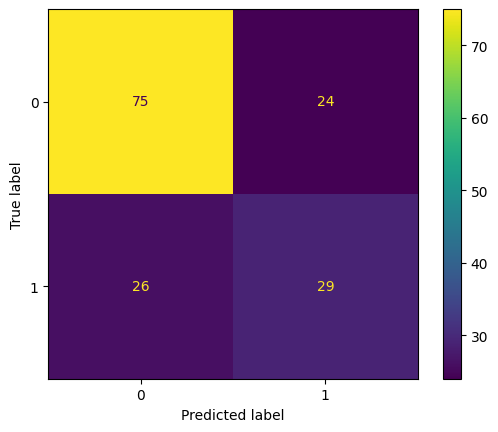

In [42]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()